In [1]:
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
df = pd.read_json(r'data/despesas_cota_parlamentar/2019.json')
gastos = json_normalize(df['dados']) 
gastos['valorLiquido'] = gastos['valorLiquido'].astype(float)
gastos['valorDocumento'] = gastos['valorDocumento'].astype(float)
gastos['valorGlosa'] = gastos['valorGlosa'].astype(float)

In [72]:
gastos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281384 entries, 0 to 281383
Data columns (total 31 columns):
nomeParlamentar               281384 non-null object
cpf                           281384 non-null object
numeroCarteiraParlamentar     281384 non-null object
legislatura                   281384 non-null int64
siglaUF                       281384 non-null object
siglaPartido                  281384 non-null object
codigoLegislatura             281384 non-null int64
numeroSubCota                 281384 non-null int64
descricao                     281384 non-null object
numeroEspecificacaoSubCota    281384 non-null int64
descricaoEspecificacao        281384 non-null object
fornecedor                    281384 non-null object
cnpjCPF                       281384 non-null object
numero                        281384 non-null object
tipoDocumento                 281384 non-null object
dataEmissao                   281384 non-null object
valorDocumento                281384 non-null

In [11]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = 'R$ {:,.2f}'.format
gastos.describe()

,legislatura,codigoLegislatura,numeroSubCota,numeroEspecificacaoSubCota,valorDocumento,valorGlosa,valorLiquido,mes,ano,parcela,numeroDeputadoID,idDocumento,idDeputado
count,"R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 281,384.00","R$ 280,479.00"
mean,"R$ 2,018.79",R$ 55.95,R$ 296.53,R$ 0.24,R$ 743.07,R$ 3.62,R$ 737.13,R$ 6.51,"R$ 2,019.00",R$ 0.00,"R$ 2,701.38","R$ 4,797,652.24","R$ 164,428.17"
std,R$ 0.89,R$ 0.22,R$ 435.75,R$ 0.45,"R$ 2,151.52",R$ 180.01,"R$ 2,106.33",R$ 3.23,R$ 0.00,R$ 0.02,R$ 782.97,"R$ 2,751,294.94","R$ 46,130.00"
min,"R$ 2,015.00",R$ 55.00,R$ 1.00,R$ 0.00,"R$ -6,605.57",R$ 0.00,"R$ -6,605.57",R$ 1.00,"R$ 2,019.00",R$ 0.00,R$ 19.00,R$ 0.00,"R$ 4,930.00"
25%,"R$ 2,019.00",R$ 56.00,R$ 3.00,R$ 0.00,R$ 50.00,R$ 0.00,R$ 50.00,R$ 4.00,"R$ 2,019.00",R$ 0.00,"R$ 2,242.00","R$ 1,681,618.75","R$ 141,513.00"
50%,"R$ 2,019.00",R$ 56.00,R$ 12.00,R$ 0.00,R$ 190.29,R$ 0.00,R$ 188.58,R$ 6.00,"R$ 2,019.00",R$ 0.00,"R$ 3,040.00","R$ 6,805,760.50","R$ 178,925.00"
75%,"R$ 2,019.00",R$ 56.00,R$ 999.00,R$ 0.00,R$ 700.00,R$ 0.00,R$ 696.03,R$ 9.00,"R$ 2,019.00",R$ 0.00,"R$ 3,304.00","R$ 6,903,110.25","R$ 204,440.00"
max,"R$ 2,019.00",R$ 56.00,R$ 999.00,R$ 4.00,"R$ 172,000.00","R$ 86,000.00","R$ 145,140.00",R$ 12.00,"R$ 2,019.00",R$ 1.00,"R$ 3,465.00","R$ 7,043,766.00","R$ 212,749.00"


In [74]:
df2 = pd.read_json(r'data/deputados.json')
deputados = json_normalize(df2['dados'])
deputados['idDeputado'] = deputados['uri'].str.extract('\/(\d+)', expand=True).astype(float)
deputados

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,idDeputado
0,https://dadosabertos.camara.leg.br/api/v2/depu...,LOPES GAMA,1,2,Caetano Maria Lopes Gama,M,[],[],1795-08-05,1864-06-21,PE,Recife,R$ 2.00
1,https://dadosabertos.camara.leg.br/api/v2/depu...,CARNEIRO,1,1,Francisco Carneiro de Campos,M,[],[],1776-01-01,1842-12-08,BA,Salvador,R$ 7.00
2,https://dadosabertos.camara.leg.br/api/v2/depu...,CALMON,1,4,Miguel Calmon Du Pin e Almeida,M,[],[],1796-12-22,1865-10-05,BA,Santo Amaro,R$ 8.00
3,https://dadosabertos.camara.leg.br/api/v2/depu...,MONTEZUMA,2,8,Francisco Gê Acayaba Montezuma,M,[],[],1794-03-23,1870-02-15,BA,Salvador,R$ 9.00
4,https://dadosabertos.camara.leg.br/api/v2/depu...,SILVA LISBOA,1,1,José da Silva Lisboa,M,[],[],1756-07-16,1835-08-20,BA,Salvador,R$ 10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,https://dadosabertos.camara.leg.br/api/v2/depu...,Fabiano Tolentino,56,56,FABIANO GALLETTI TOLENTINO,M,[],[],1974-02-25,,MG,Belo Horizonte,"R$ 211,866.00"
7616,https://dadosabertos.camara.leg.br/api/v2/depu...,Fernando Borja,56,56,FERNANDO BORJA PINTO,M,[],[],1965-08-16,,MG,Belo Horizonte,"R$ 212,504.00"
7617,https://dadosabertos.camara.leg.br/api/v2/depu...,Dr. Gonçalo,56,56,ANTONIO ELIZABETH GONÇALO DE SOUSA,M,[],[],1953-07-08,,MA,Pastos Bons,"R$ 212,625.00"
7618,https://dadosabertos.camara.leg.br/api/v2/depu...,Marcão Gomes,56,56,MARCUS WELBER GOMES DA SILVA,M,"[dep.marcaogomes, @sigamarcaogomes]",[],1974-09-10,,RJ,Rio de Janeiro,"R$ 212,749.00"


In [75]:
# 56 = Legislatura fev-2019 - jan-2023
deputadosLegislatura56 = deputados.loc[deputados['idLegislaturaFinal'] == 56]
deputadosLegislatura56

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,idDeputado
2843,https://dadosabertos.camara.leg.br/api/v2/depu...,Norma Ayub,55,56,NORMA AYUB ALVES,F,[],[],1959-09-07,,ES,Vitória,"R$ 66,179.00"
2846,https://dadosabertos.camara.leg.br/api/v2/depu...,Fausto Pinato,55,56,FAUSTO RUY PINATO,M,[],[],1977-06-01,,SP,Fernandópolis,"R$ 66,828.00"
2848,https://dadosabertos.camara.leg.br/api/v2/depu...,Iracema Portella,54,56,IRACEMA MARIA PORTELLA NUNES NOGUEIRA LIMA,F,"[http://twitter.com/iracemaportela, http://ww...",[],1966-04-23,,PI,Teresina,"R$ 67,138.00"
2853,https://dadosabertos.camara.leg.br/api/v2/depu...,Fábio Henrique,56,56,FABIO HENRIQUE SANTANA DE CARVALHO,M,"[fabiohenriquese12, @FabioHenriqueSE]",[],1972-06-19,,SE,Simão Dias,"R$ 68,720.00"
2855,https://dadosabertos.camara.leg.br/api/v2/depu...,Bacelar,55,56,JOAO CARLOS BACELAR BATISTA,M,[],[],1957-07-09,,BA,Esplanada,"R$ 69,871.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,https://dadosabertos.camara.leg.br/api/v2/depu...,Fabiano Tolentino,56,56,FABIANO GALLETTI TOLENTINO,M,[],[],1974-02-25,,MG,Belo Horizonte,"R$ 211,866.00"
7616,https://dadosabertos.camara.leg.br/api/v2/depu...,Fernando Borja,56,56,FERNANDO BORJA PINTO,M,[],[],1965-08-16,,MG,Belo Horizonte,"R$ 212,504.00"
7617,https://dadosabertos.camara.leg.br/api/v2/depu...,Dr. Gonçalo,56,56,ANTONIO ELIZABETH GONÇALO DE SOUSA,M,[],[],1953-07-08,,MA,Pastos Bons,"R$ 212,625.00"
7618,https://dadosabertos.camara.leg.br/api/v2/depu...,Marcão Gomes,56,56,MARCUS WELBER GOMES DA SILVA,M,"[dep.marcaogomes, @sigamarcaogomes]",[],1974-09-10,,RJ,Rio de Janeiro,"R$ 212,749.00"


In [81]:
gastosLegislatura56 = pd.merge(left=gastos, right=deputadosLegislatura56, left_on='idDeputado', right_on='idDeputado')

In [82]:
gastos2019 = gastosLegislatura56.groupby("nomeParlamentar")["valorLiquido"].sum().reset_index().sort_values('valorLiquido', ascending=False)
gastos2019.to_json('data/output/gastos-por-deputado-2019.json', orient='records', lines=True)
gastos2019
# There are expenses with deputies from the previous legislature (Jan 2019)

,nomeParlamentar,valorLiquido
258,Jhonatan de Jesus,"R$ 548,429.94"
240,Hiran Gonçalves,"R$ 542,487.76"
427,Perpétua Almeida,"R$ 539,084.57"
9,Afonso Motta,"R$ 536,478.73"
290,Jéssica Sales,"R$ 534,565.69"
...,...,...
346,Marcelo Álvaro Antônio,"R$ 2,766.48"
395,Osmar Terra,R$ 388.56
500,Tereza Cristina,R$ 49.49
392,Onyx Lorenzoni,R$ 46.86


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f1d6cf2b0>],
      dtype=object)

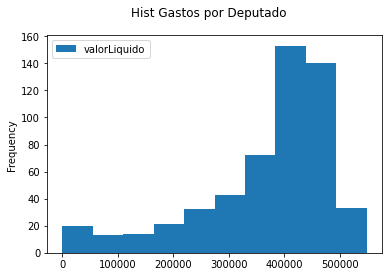

In [83]:
gastos2019.plot.hist(subplots=True,title='Hist Gastos por Deputado')

In [84]:
gastoPorPartido = gastos.groupby("siglaPartido").agg(gastoTotal=('valorLiquido', 'sum'), countParlamentar=('idDeputado', 'count'), quantidadeParlamentar=('idDeputado', 'nunique')
                                                    ).reset_index().rename(columns={'idDeputado': 'countGastos'})
gastoPorPartido['gastoPorParlamentar'] = gastoPorPartido['gastoTotal']/gastoPorPartido['quantidadeParlamentar']
gastoPorPartido['gastoPorReembolso'] = gastoPorPartido['gastoTotal']/gastoPorPartido['countParlamentar']
gastoPorPartido

,siglaPartido,gastoTotal,countParlamentar,quantidadeParlamentar,gastoPorParlamentar,gastoPorReembolso
0,,"R$ 920,665.54",0,0,R$ inf,R$ inf
1,AVANTE,"R$ 2,471,129.28",4020,12,"R$ 205,927.44",R$ 614.71
2,CIDADANIA,"R$ 2,706,904.81",5053,8,"R$ 338,363.10",R$ 535.70
3,DEM,"R$ 11,576,123.54",13701,55,"R$ 210,474.97",R$ 844.91
4,MDB,"R$ 15,022,383.94",19731,62,"R$ 242,296.52",R$ 761.36
5,NOVO,"R$ 812,352.50",3027,8,"R$ 101,544.06",R$ 268.37
6,PATRI,"R$ 161,737.83",154,5,"R$ 32,347.57","R$ 1,050.25"
7,PATRIOTA,"R$ 2,329,837.74",2796,6,"R$ 388,306.29",R$ 833.28
8,PCdoB,"R$ 3,693,337.40",3911,13,"R$ 284,102.88",R$ 944.35
9,PDT,"R$ 11,849,976.67",15109,37,"R$ 320,269.64",R$ 784.30


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f1d413a58>],
      dtype=object)

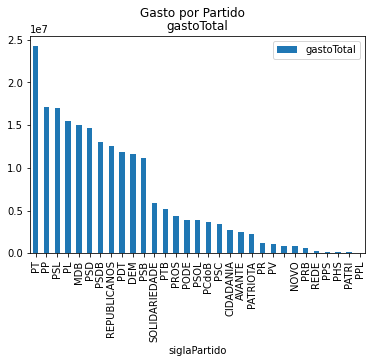

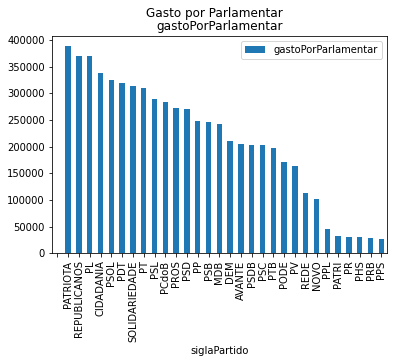

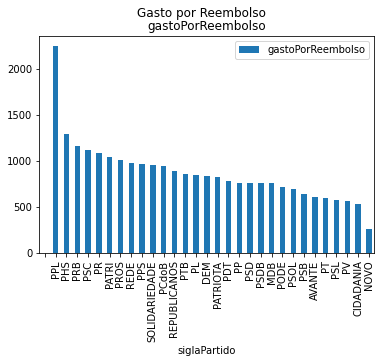

In [85]:
gastoPorPartido.sort_values('gastoTotal', ascending=False).plot.bar(x='siglaPartido', y='gastoTotal', title='Gasto por Partido', subplots=True)
gastoPorPartido.sort_values('gastoPorParlamentar', ascending=False).plot.bar(x='siglaPartido', y='gastoPorParlamentar', title='Gasto por Parlamentar', subplots=True)
gastoPorPartido.sort_values('gastoPorReembolso', ascending=False).plot.bar(x='siglaPartido', y='gastoPorReembolso', title='Gasto por Reembolso', subplots=True)

In [86]:
gastos2019Cat = gastos.groupby(["nomeParlamentar", "descricao"])["valorLiquido"].sum().reset_index().sort_values('nomeParlamentar', ascending=False)
gastos2019Cat

,nomeParlamentar,descricao,valorLiquido
7048,Áurea Carolina,TELEFONIA,"R$ 1,836.99"
7041,Áurea Carolina,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,"R$ 25,609.04"
7034,Áurea Carolina,ASSINATURA DE PUBLICAÇÕES,R$ 504.90
7035,Áurea Carolina,COMBUSTÍVEIS E LUBRIFICANTES.,"R$ 13,935.01"
7036,Áurea Carolina,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.","R$ 43,114.00"
...,...,...,...
3,ABEL MESQUITA JR.,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,"R$ 10,132.40"
1,ABEL MESQUITA JR.,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,"R$ 15,000.00"
5,ABEL MESQUITA JR.,SERVIÇOS POSTAIS,R$ 109.85
6,ABEL MESQUITA JR.,TELEFONIA,R$ 472.35


In [87]:
pd.options.display.float_format = 'R$ {:,.2f}'.format
categorias = gastos.groupby("descricao")["valorLiquido"].sum().reset_index().sort_values('valorLiquido', ascending=False)
categorias

,descricao,valorLiquido
4,Emissão Bilhete Aéreo,"R$ 53,952,418.03"
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,"R$ 49,135,152.36"
9,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,"R$ 26,502,349.15"
10,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,"R$ 23,193,379.14"
2,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.","R$ 20,457,257.91"
1,COMBUSTÍVEIS E LUBRIFICANTES.,"R$ 16,516,599.31"
17,TELEFONIA,"R$ 4,882,339.63"
12,PASSAGENS AÉREAS,"R$ 3,706,927.76"
16,SERVIÇOS POSTAIS,"R$ 1,922,242.37"
6,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...","R$ 1,762,799.59"


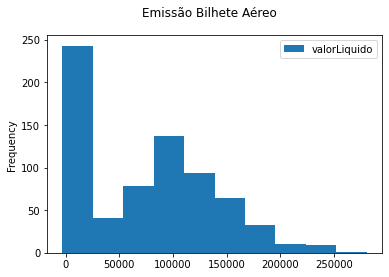

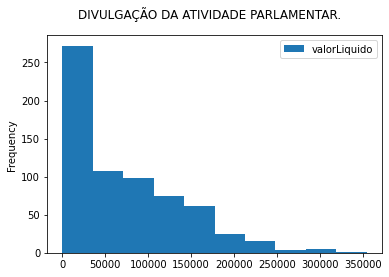

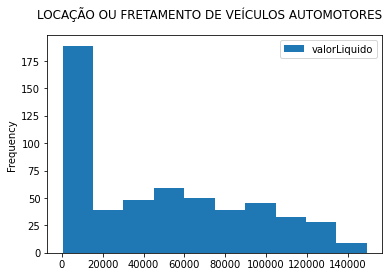

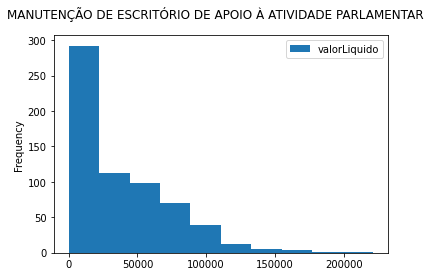

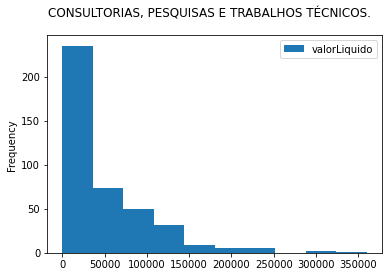

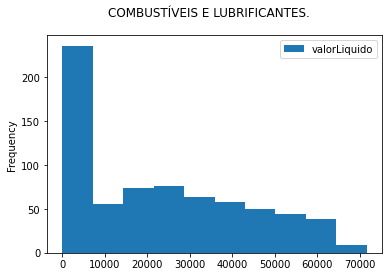

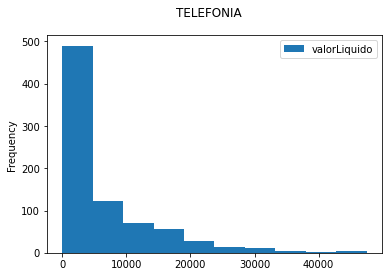

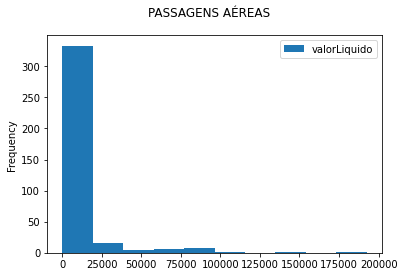

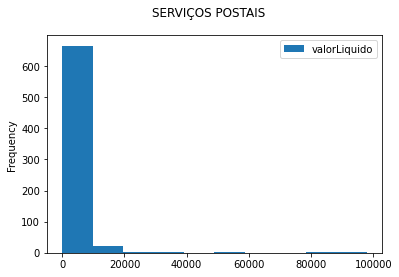

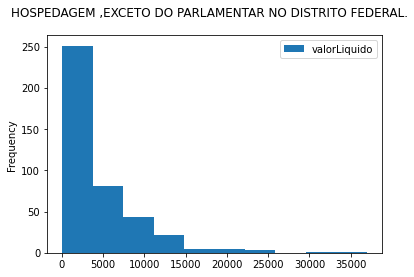

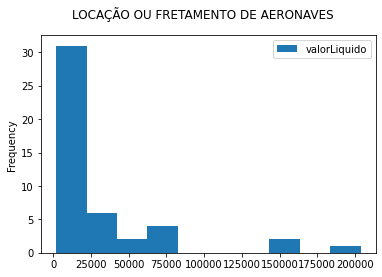

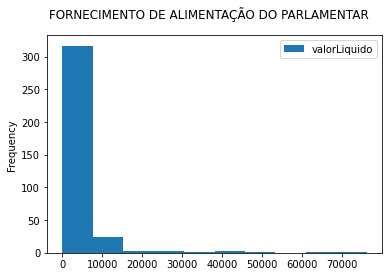

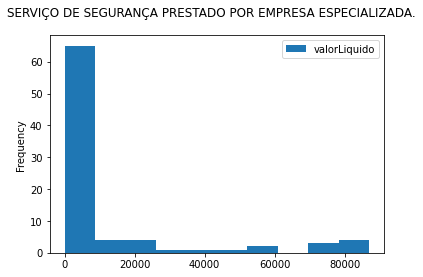

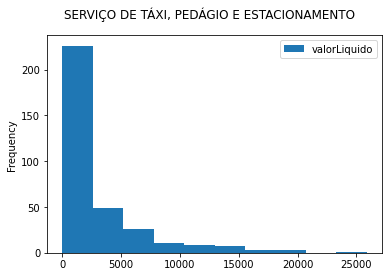

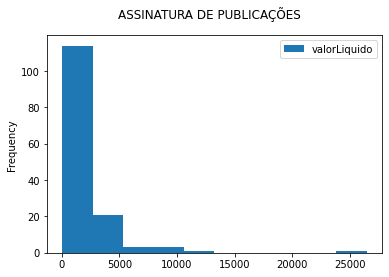

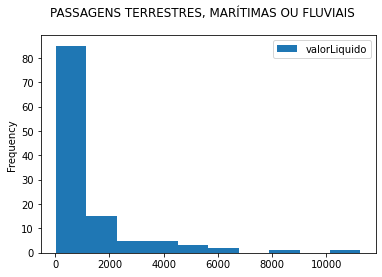

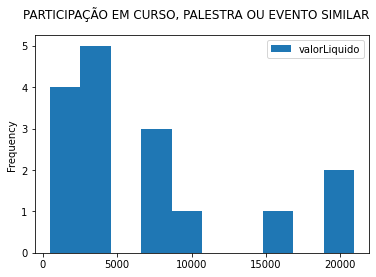

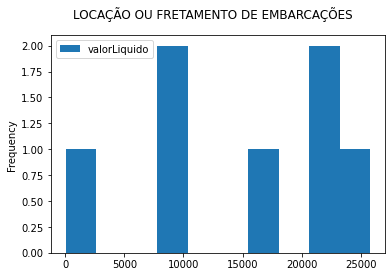

In [89]:
for i, j in categorias.iterrows():
    gastos.loc[gastos['descricao'] == categorias['descricao'][i]].groupby("nomeParlamentar")["valorLiquido"].sum().reset_index().plot.hist(subplots=True,title=categorias['descricao'][i])